In [1]:
using Laplacians

In [2]:
include("../../src/samplingTreeSolver.jl")

purge (generic function with 1 method)

In [3]:
n = 100000;
b = rand(n); b = b - mean(b);

In [7]:
tbuild = [Float64[] for i in 1:5]
tsolve = [Float64[] for i in 1:5]
ks = [Float64[] for i in 1:5]
betas = [Float64[] for i in 1:5]
solverNorms = [Float64[] for i in 1:5]
err = [Float64[] for i in 1:5]
times = [1,1.5,2,2.5,3]

for i in 1:5
    a = chimera(n, i);
    la = lap(a);
    
    for beta in 1:10
        for t in times
            k = beta * t;
            tic()
            f = samplingSolver(a, eps = 0.5, sampConst = 0.005, k = 1.0 * k, beta = 1.0 * beta)
            push!(tbuild[i], toc())
            
            _,gOp,_,_,_ = buildSolver(a, eps = 0.5, sampConst = 0.005, k = 1.0 * k, beta = 1.0 * beta)
            push!(err[i], checkError(gOp))
            
            tic()
            nrm = norm(la * f(b) - b)
            push!(solverNorms[i], nrm)
            push!(tsolve[i], toc())
            
            push!(betas[i], beta)
            push!(ks[i], k)
            
            println()
        end
        
        println()
        println("Done for beta = ", beta)
        println()
    end
    
    println()
    println()
    println()
    println("Done for i = ", i)
    println()
    println()
    println()
    
end

Time to build the tree and compute the stretch: elapsed time: 1.066419794 seconds
The mean value of multiedges in the graph: 2.9834733775725897
elapsed time: 8.108808883 seconds
Time to build the tree and compute the stretch: elapsed time: 1.255215757 seconds
The mean value of multiedges in the graph: 2.9831815457098085
PCG stopped after: 14 iterations with relative error 3.7762055164201254e-7.
elapsed time: 1.994656445 seconds

Time to build the tree and compute the stretch: elapsed time: 1.016487463 seconds
The mean value of multiedges in the graph: 2.9361230005573726
elapsed time: 9.060741726 seconds
Time to build the tree and compute the stretch: elapsed time: 1.465065302 seconds
The mean value of multiedges in the graph: 2.9356944546687838
PCG stopped after: 14 iterations with relative error 5.438255473224434e-7.
elapsed time: 0.95906104 seconds

Time to build the tree and compute the stretch: elapsed time: 1.00155233 seconds
The mean value of multiedges in the graph: 2.9061379339

In [10]:
err[1]'

1x50 Array{Float64,2}:
 0.992884  1.18063  1.28109  1.01032  …  0.812982  0.869805  0.851895

In [12]:
err[2]'

1x50 Array{Float64,2}:
 3.84037  5.09831  3.53464  4.37502  …  2.53967  2.59998  2.33411  2.49446

In [13]:
err[3]'

1x50 Array{Float64,2}:
 4.02926  3.21933  2.76817  3.22543  …  1.55903  2.22344  1.93441  1.78697

In [14]:
err[4]'

1x50 Array{Float64,2}:
 1.25879  1.65656  1.41731  1.27391  1.65699  …  0.640315  0.724862  0.854454

In [15]:
err[5]'

1x50 Array{Float64,2}:
 3.48558  4.51144  3.35341  3.31647  …  2.52422  1.97079  1.96406  2.3771

In [17]:
ks[4]'

1x50 Array{Float64,2}:
 1.0  1.5  2.0  2.5  3.0  2.0  3.0  …  27.0  10.0  15.0  20.0  25.0  30.0

In [19]:
betas[4]'

1x50 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  …  9.0  10.0  10.0  10.0  10.0  10.0

In [20]:
using PyPlot

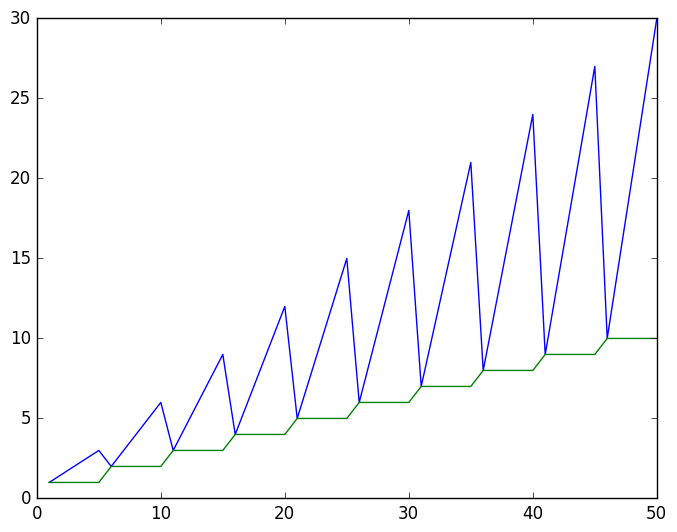

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3172b4890>

In [24]:
plot(1:50, ks[1])
plot(1:50, betas[1])

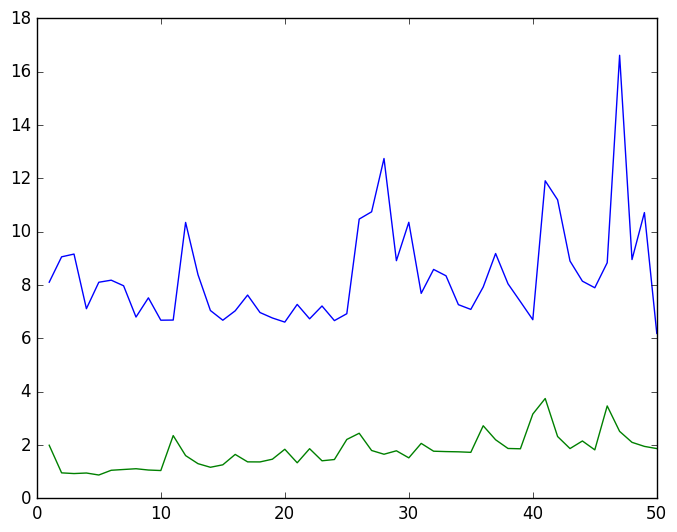

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3184da250>

In [28]:
plot(1:50, tbuild[1])
plot(1:50, tsolve[1])

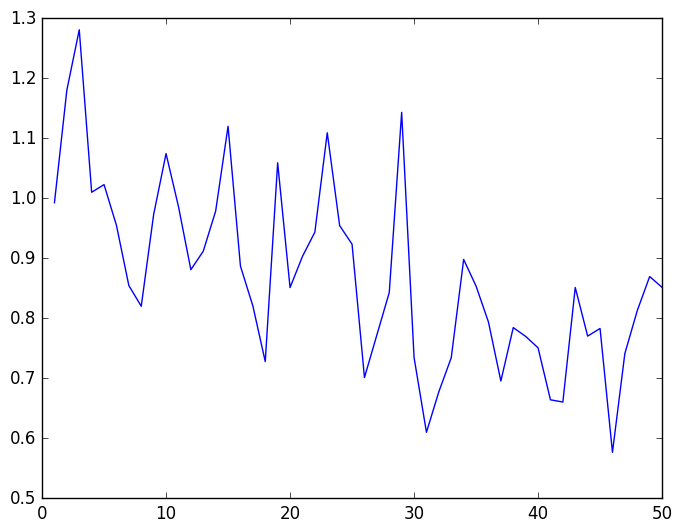

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x318a74810>

In [30]:
plot(1:50, err[1])

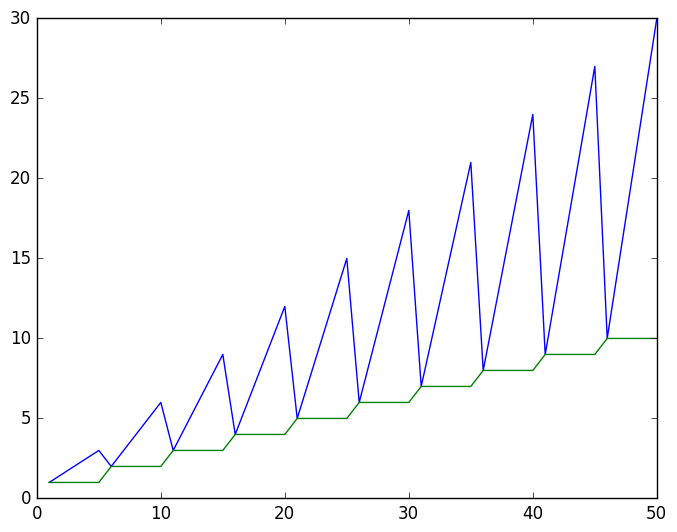

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x318aa9410>

In [31]:
plot(1:50, ks[2])
plot(1:50, betas[2])

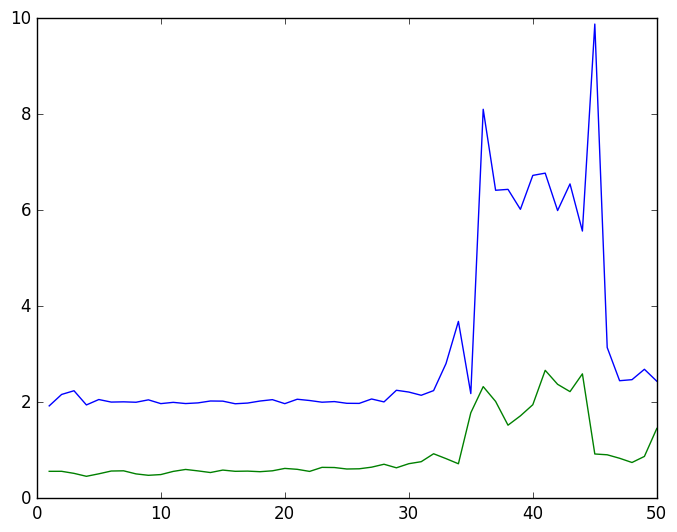

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3190bb6d0>

In [32]:
plot(1:50, tbuild[2])
plot(1:50, tsolve[2])

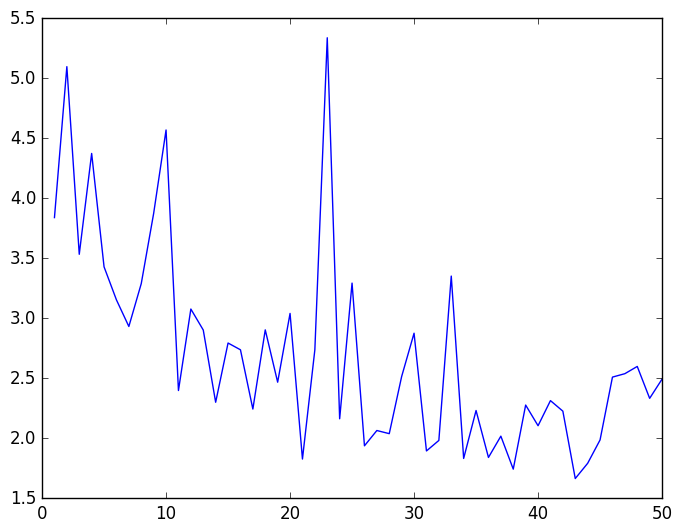

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31ba25c10>

In [34]:
plot(1:50, err[2])

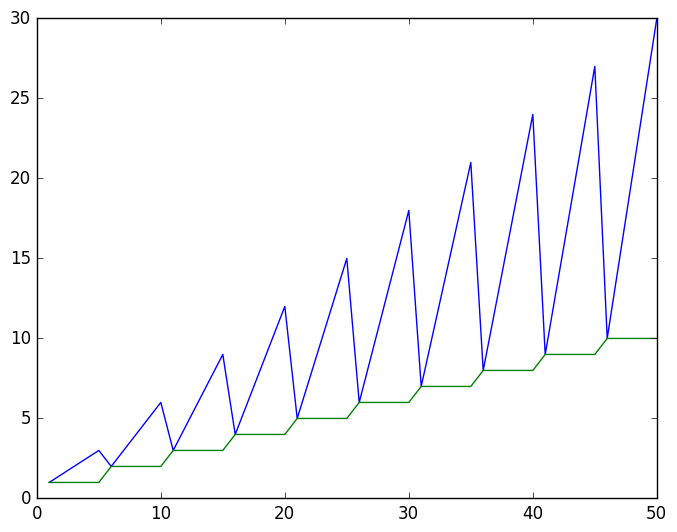

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31ba62890>

In [35]:
plot(1:50, ks[3])
plot(1:50, betas[3])

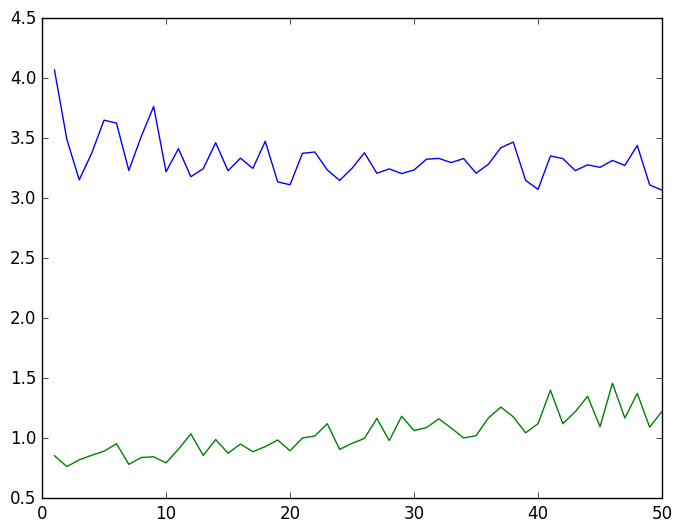

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31c0f2190>

In [36]:
plot(1:50, tbuild[3])
plot(1:50, tsolve[3])

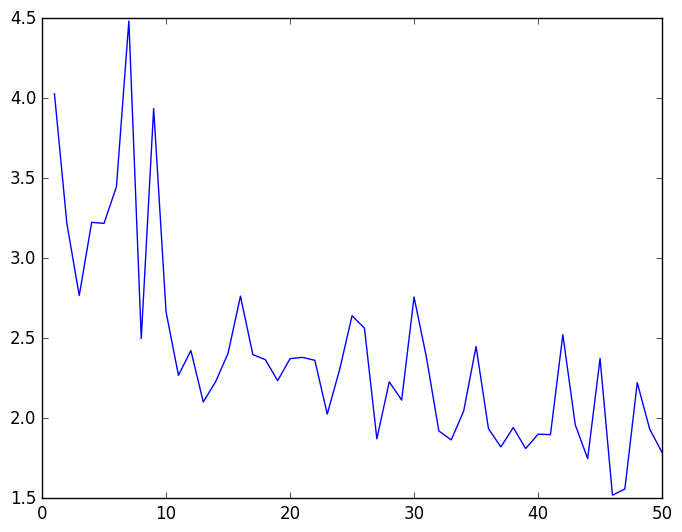

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31d797b10>

In [37]:
plot(1:50, err[3])

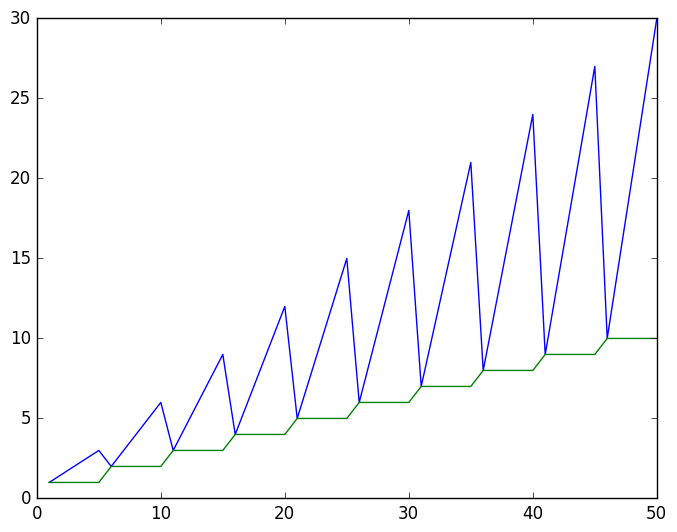

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31d7cc610>

In [38]:
plot(1:50, ks[4])
plot(1:50, betas[4])

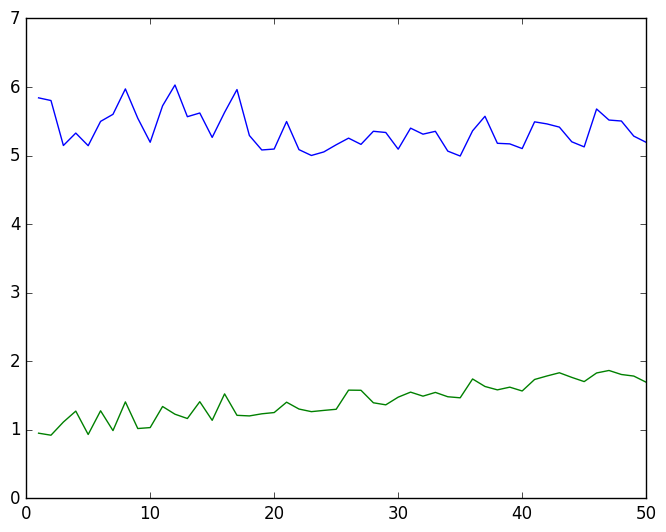

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31da4c110>

In [39]:
plot(1:50, tbuild[4])
plot(1:50, tsolve[4])

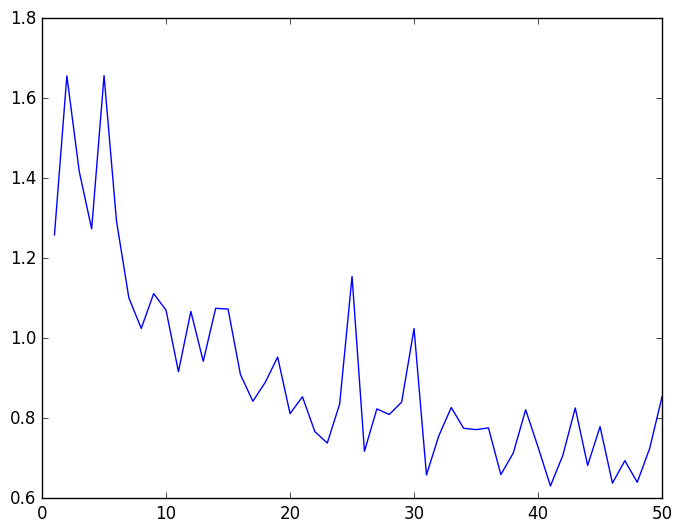

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31df408d0>

In [40]:
plot(1:50, err[4])

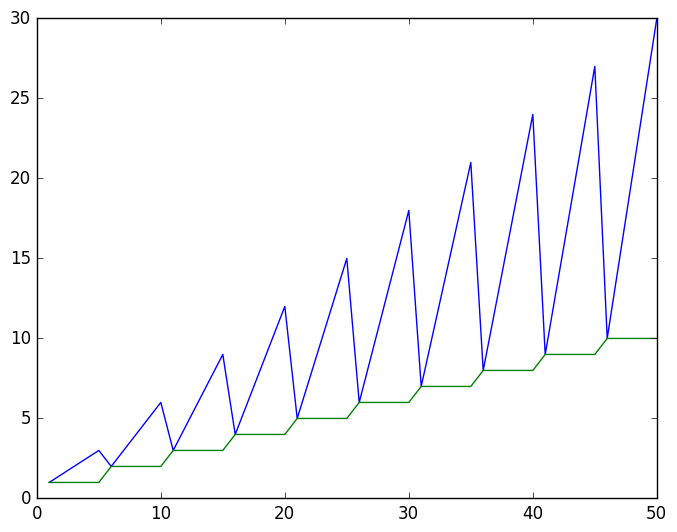

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31e1f46d0>

In [41]:
plot(1:50, ks[5])
plot(1:50, betas[5])

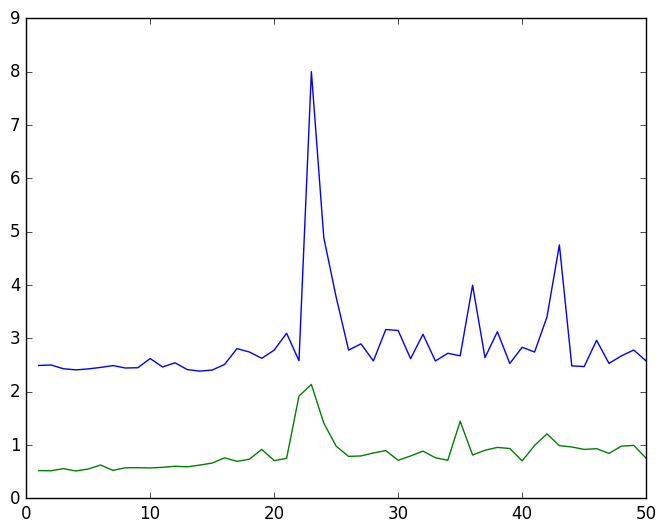

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31e1ec050>

In [42]:
plot(1:50, tbuild[5])
plot(1:50, tsolve[5])

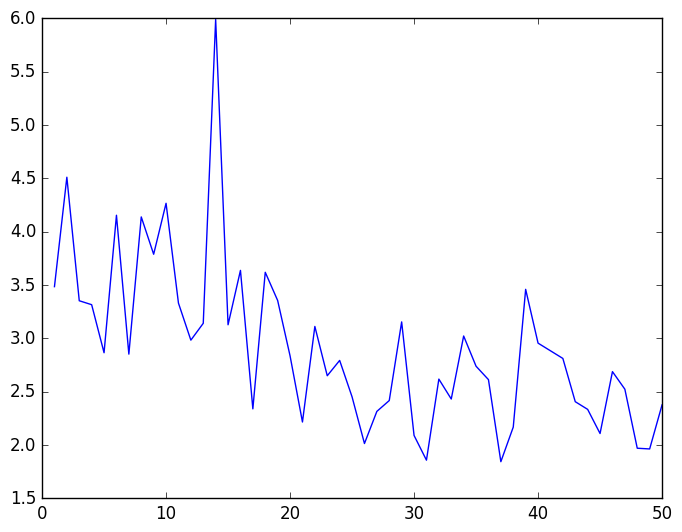

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31e6f5110>

In [43]:
plot(1:50, err[5])

In [9]:
@time f = samplingSolver(a, eps = 0.5, sampConst = 0.005, k = 30.0, beta = 10.0)

Time to build the tree and compute the stretch: elapsed time: 2.197319983 seconds
The mean value of multiedges in the graph: 2.2101767817518323
  8.035255 seconds (15.44 M allocations: 3.303 GB, 33.82% gc time)


f (generic function with 1 method)

In [10]:
b = rand(n); b = b - mean(b);

In [11]:
@time norm(lap(a) * f(b) - b)

PCG stopped after: 28 iterations with relative error 7.232785417565344e-7.
  1.837196 seconds (5.60 M allocations: 243.564 MB, 1.78% gc time)


6.600161197250377e-5